In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

Expected value of max(a, b): 13.825


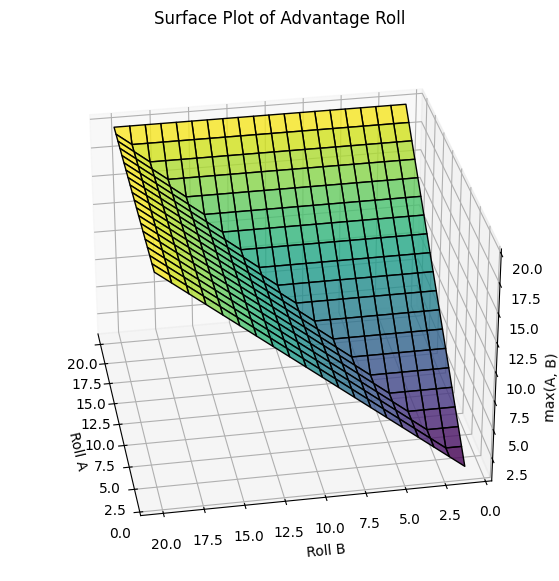

In [2]:
# Expected Value
a = np.arange(1, 21)
b = np.arange(1, 21)
A, B = np.meshgrid(a, b)
X = np.maximum(A, B)
print(f'Expected value of max(a, b): {np.mean(X):.3f}')

# Surface plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, X, cmap='viridis', edgecolor='k', alpha=0.8)
ax.set_xlabel('Roll A')
ax.set_ylabel('Roll B')
ax.set_zlabel('max(A, B)')
ax.set_title('Surface Plot of Advantage Roll')
ax.view_init(elev=30, azim=170)
plt.show()

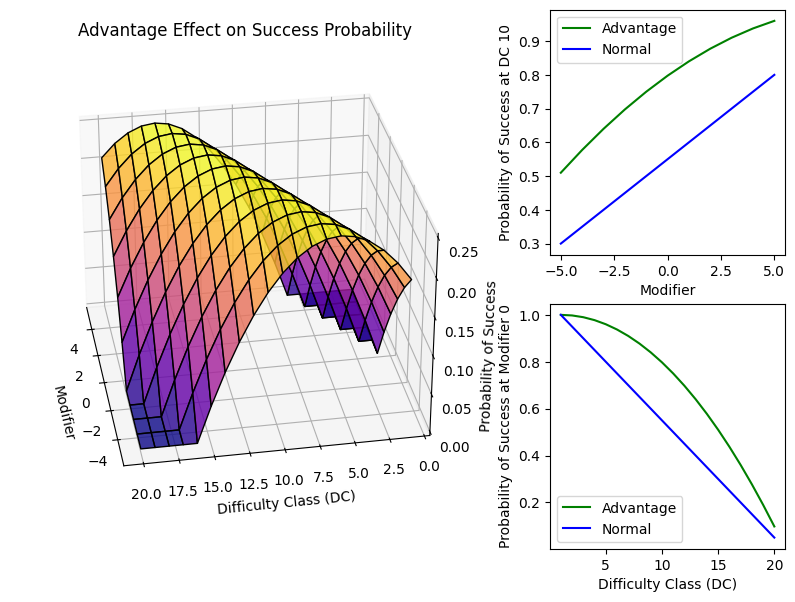

In [5]:
def roll(modifier: int, dc: int, dice_sides: int=20, calculate_critical: bool=False) -> float:
    rolls = np.arange(1, dice_sides + 1)
    success = (rolls + modifier) >= dc
    if calculate_critical and dice_sides == 20:
        success = success.astype(int)
        success[0], success[-1] = -1, 2
    return success.mean()

def roll_advantage(modifier: int, dc: int, dice_sides: int=20, calculate_critical: bool=False) -> float:
    rolls = np.arange(1, dice_sides + 1)
    success_matrix = (np.maximum.outer(rolls, rolls) + modifier) >= dc
    if calculate_critical and dice_sides == 20:
        success_matrix = success_matrix.astype(int)
        success_matrix[0, 0] = -1
        success_matrix[:, -1], success_matrix[-1, :] = 2, 2
    return success_matrix.mean()

def simulate_rolls(modifier: np.ndarray, dc: np.ndarray, dice_sides: int=20, calculate_critical: bool=False) -> tuple[np.ndarray, np.ndarray]:
    normal = np.array([roll(m, d, dice_sides, calculate_critical) for m in modifier for d in dc]).reshape(len(modifier), len(dc))
    advantage = np.array([roll_advantage(m, d, dice_sides, calculate_critical) for m in modifier for d in dc]).reshape(len(modifier), len(dc))
    return normal, advantage

def plot_rolls(modifier: np.ndarray, dc: np.ndarray, dice_sides: int=20, calculate_critical: bool=False):
    normal, advantage = simulate_rolls(modifier, dc, dice_sides, calculate_critical)
    diff = advantage - normal
    fig = plt.figure(figsize=(10, 7))
    gs = GridSpec(
        2, 2,
        width_ratios=[2, 1],
        height_ratios=[1, 1],
        figure=fig
    )
    ax1 = fig.add_subplot(gs[:, 0], projection='3d')
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, 1])

    mod_mesh, dc_mesh = np.meshgrid(modifier, dc, indexing='ij')
    ax1.plot_surface(mod_mesh, dc_mesh, diff, cmap='plasma', edgecolor='k', alpha=0.8)
    ax1.view_init(azim=170)
    ax1.set_xlabel('Modifier')
    ax1.set_ylabel('Difficulty Class (DC)')
    ax1.set_zlabel('Probability of Success')
    ax1.set_title('Advantage Effect on Success Probability')
    
    ax2.plot(modifier, advantage[:, dc == 10][:, 0], label='Advantage', color='green')
    ax2.plot(modifier, normal[:, dc == 10][:, 0], label='Normal', color='blue')
    ax2.set_xlabel('Modifier')
    ax2.set_ylabel('Probability of Success at DC 10')
    ax2.legend()

    ax3.plot(dc, advantage[modifier == 0][0], label='Advantage', color='green')
    ax3.plot(dc, normal[modifier == 0][0], label='Normal', color='blue')
    ax3.set_xlabel('Difficulty Class (DC)')
    ax3.set_ylabel('Probability of Success at Modifier 0')
    ax3.legend()
    
    plt.show()

plot_rolls(modifier=np.arange(-5, 6), dc=np.arange(1, 21), dice_sides=20)
